## Observations and Insights 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_df = "data/Mouse_metadata.csv"

study_results_df = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_df)
study_results = pd.read_csv(study_results_df)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,on= ["Mouse ID", "Mouse ID"], how="outer")
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:
# Checking the number of mice.
drop_dup_results = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint']) 
drop_dup_results
#num_mice = (mouse_metadata["Mouse ID"]).value_counts()
#num_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mouse_id= combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [58]:
# Optional: Get all the data for the duplicate mouse ID. 

get_data_dup_mouse= combined_data[combined_data["Mouse ID"]=='g989']

get_data_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = get_data_dup_mouse.drop_duplicates('Mouse ID')
#clean_data
clean_data = combined_data[combined_data['Mouse ID'].isin(get_data_dup_mouse)==False]

unique_minus_id=clean_data['Mouse ID'].nunique()
unique_minus_id

249

In [60]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_data["Mouse ID"].value_counts()
clean_data_of_mice=len(clean_mice)
clean_data_of_mice





249

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_reg = combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_reg= combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_reg = combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stadev_reg=combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)'] 
sems_reg = combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'] 

# Assemble the resulting series into a single summary dataframe.

sum_stat_df = pd.DataFrame({"Mean":mean_reg, "Median":median_reg, "Variance": var_reg,
                            "Standard Deviation":stadev_reg,"SEM":sems_reg})
                           

sum_stat_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line =combined_data.groupby('Drug Regimen')
stats= single_line.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

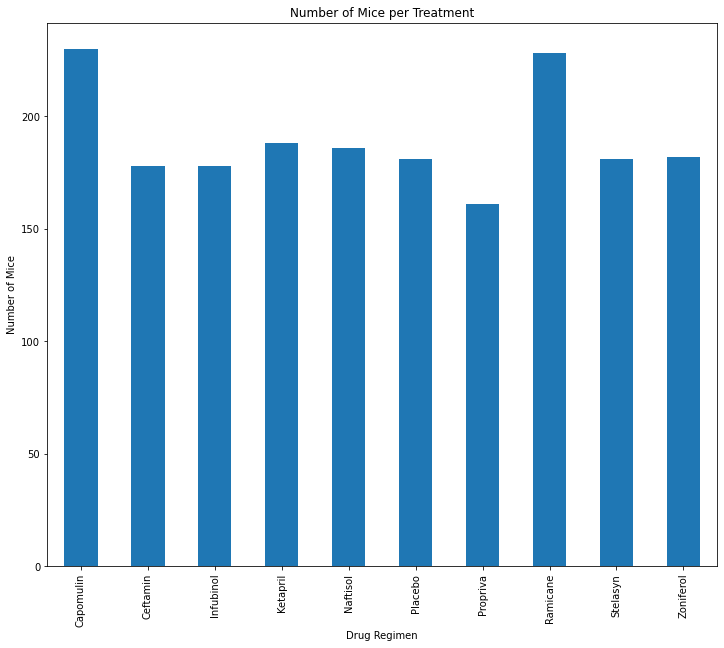

<Figure size 432x288 with 0 Axes>

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_pandas = combined_data.groupby('Drug Regimen').count()['Mouse ID']                            
bar_pandas.plot(kind='bar', figsize=(12,10))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


plt.show()
plt.tight_layout()




<function matplotlib.pyplot.show(*args, **kw)>

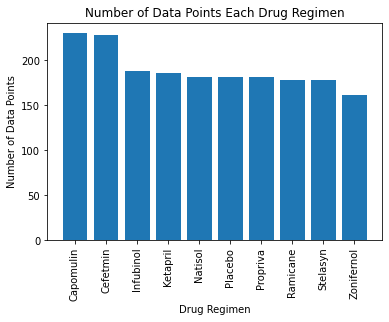

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen_count = combined_data["Drug Regimen"].value_counts()

#Set a-xis to proper length
x_axis = np.arange(len(drug_regimen_count))

#create bar graph
plt.bar(x_axis, drug_regimen_count)

tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, ["Capomulin", "Cefetmin", "Infubinol", "Ketapril","Natisol","Placebo","Propriva","Ramicane",
                      "Stelasyn","Zonifernol"], rotation = 'vertical')
#Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points Each Drug Regimen")

plt.grid
plt.show

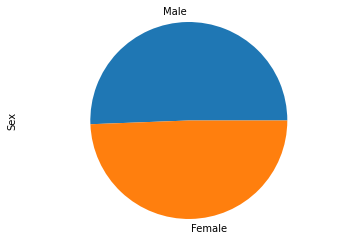

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = combined_data["Sex"].value_counts()

gender_data.plot(kind="pie")
plt.axis('equal')
plt.show()

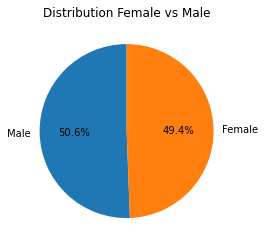

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data, labels=gender_data.index.values,autopct="%1.1f%%", startangle=90)
plt.title("Distribution Female vs Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = combined_data.groupby(["Mouse ID"])["Timepoint"].max()

last_timepoint=last_timepoint.reset_index()
last_timepoint
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_timepoints =last_timepoint.merge(combined_data, on= ['Mouse ID', "Timepoint"], how="left") 
merged_data_timepoints




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [93]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list =["Propiva", "Ramicane", "Infubinol", "Naftisol", "Ceftamin", "Stelasyn"]


# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment :
   tumor_volume =  merged_data_timepoints.loc[merged_data_timepoints["Drug Regimen"] = drug,"Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    total_tumor_column.append()
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: invalid syntax (<ipython-input-93-d324a5604f9c>, line 12)

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

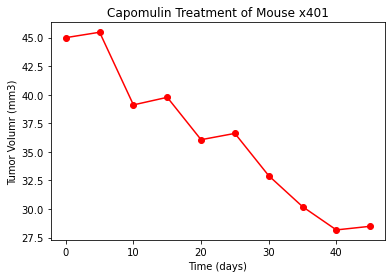

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"].head(40)
capomulin_mouse = combined_data[combined_data["Mouse ID"]=="x401"]

#Plot line chart
plt.plot(capomulin_mouse["Timepoint"],capomulin_mouse["Tumor Volume (mm3)"], marker= "o", color="r")

#Add labels
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volumr (mm3)")
plt.title("Capomulin Treatment of Mouse x401")

plt.show()

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Find all mice treated with Capomulin
all_capomulin_mice = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]

#find average of each mouse 
average_volume = 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
